In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag, pos_tag_sents
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
import re
re1 = re.compile(r'  +')
import html
import string
from wordcloud import WordCloud #pip3 install wordcloud in anaconda prompt if needed
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


C:\Users\mosha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mosha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mosha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mosha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mosha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mosha\AppData\Roaming\nltk_data...
[

In [2]:
df = pd.read_csv("AllSaudiCitiesReviewsBooking.csv")
df.head()

Unnamed: 0       Hotel_name  Reviewer_rating reviewer_name       Country  \
0           0  fndq-wryf-lshrq              1.0         Saleh  Saudi Arabia   
1           1  fndq-wryf-lshrq             10.0         Hatem  Saudi Arabia   
2           2  fndq-wryf-lshrq              8.0           Ali  Saudi Arabia   
3           3      golden-dune              8.0            Dr  Saudi Arabia   
4           4      golden-dune              8.0          Eyad  Saudi Arabia   

                                      Overall_review  Review_times  \
0  “don’t trust the stuff make everything on pape...            11   
1                                        Exceptional            32   
2                                          Very Good            53   
3                      “Very good Hotel east Riyadh”            33   
4                                  “Value for money”           118   

  Review_date                                        Review_tags  \
0  2022-08-07  Business trip, Couple, Small Double Room, Stay...   
1  2022-08-17  Leisure trip, Couple, Small Double Room, Staye...   
2  2022-08-06  Leisure trip, Family with young children, Stud...   
3  2022-09-01  Leisure trip, Couple, Superior Double Room, St...   
4  2022-08-30  Business trip, Solo traveler, Superior Double ...   

                                     negative_review  \
0                       the staff was very very bad.   
1                                                NaN   
2                                                NaN   
3  We had one problem with the small flies in the...   
4                                           Location   

                                     positive_review  
0                                       the location  
1                                                NaN  
2                                                NaN  
3  The size of the room was REALLY good; the bed ...  
4                                    Great breakfast

In [3]:
print(df.shape)

(357583, 11)


In [4]:
print(df.columns)

Index(['Unnamed: 0', 'Hotel_name', 'Reviewer_rating', 'reviewer_name',
       'Country', 'Overall_review', 'Review_times', 'Review_date',
       'Review_tags', 'negative_review', 'positive_review'],
      dtype='object')


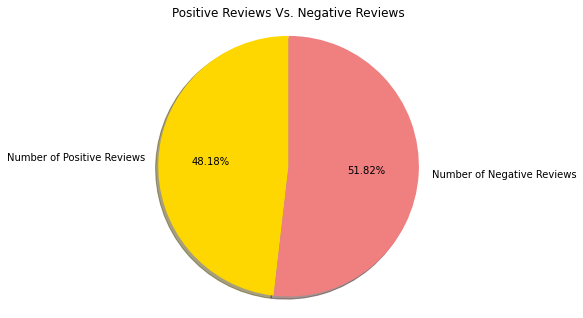

In [5]:
# Distribution of Positive and Negative Reviews
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
count_neg = df['negative_review'].count()
count_Pos= df['positive_review'].count()

values = (count_neg), (count_Pos)
ax.pie(values, 
 labels = ['Number of Positive Reviews', 'Number of Negative Reviews'],
 colors=['gold', 'lightcoral'],
 shadow=True,
 startangle=90, 
 autopct='%1.2f%%')
ax.axis('equal')
plt.title('Positive Reviews Vs. Negative Reviews');

In [6]:
# Violin Plot of the Customer Ratings for the top 10 reviewers’ country of origin

In [7]:
contry_series = df.Country.value_counts()[:10]
country_df = contry_series.to_frame()
country_df.columns = ['Count'] 
# This result in one colomn! why?

country_df

Count
Saudi Arabia              276429
United Arab Emirates       11258
United Kingdom              9145
United States of America    8127
Egypt                       7483
Qatar                       5434
Kuwait                      4683
Pakistan                    4009
Malaysia                    3615
India                       3492

In [8]:
fig = px.bar(x=country_df.index, y=country_df['Count'], 
             title='Customer Ratings for the top 10 reviewers’ country of origin')
fig.show() 

In [9]:
df.Country.value_counts()[:10].index.tolist()

['Saudi Arabia',
 'United Arab Emirates',
 'United Kingdom',
 'United States of America',
 'Egypt',
 'Qatar',
 'Kuwait',
 'Pakistan',
 'Malaysia',
 'India']

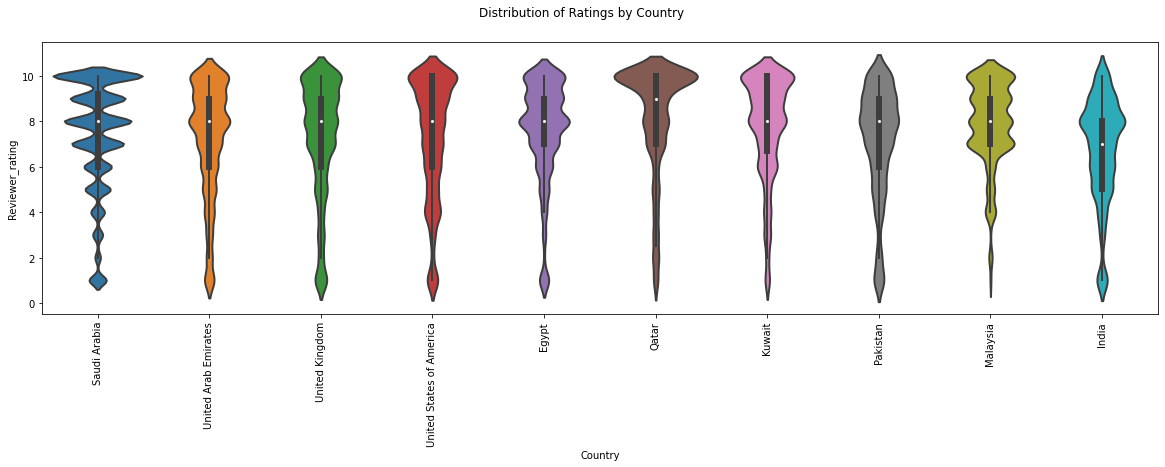

In [10]:
top10_list = df.Country.value_counts()[:10].index.tolist()
top10 = df[df.Country.isin(top10_list)]
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
ax = sns.violinplot(x = 'Country', 
 y = 'Reviewer_rating',
 data = top10, 
 order = top10_list,
 linewidth = 2) 
plt.suptitle('Distribution of Ratings by Country') 
plt.xticks(rotation=90);

In [11]:
# Distribution of Review Tags Count for each Trip Type

In [12]:
#Define tag list
tag_list_people = ['Group','Couple','Family','friends','Solo']

#Count for each review tag
tag_counts_people = []
for tag in tag_list_people:
    counts_people = df['Review_tags'].str.count(tag).sum()
    tag_counts_people.append(counts_people)
    
#Convert to a dataframe
trip_type_people = pd.DataFrame({'Trip Type':tag_list_people,'Counts':tag_counts_people}).sort_values('Counts',ascending = False)
    
    
#Visualize the trip type counts from Review_tags
fig_people = px.bar(trip_type_people, x='Trip Type', y='Counts', title='Review Tags Counts for each Trip Type')
fig_people.show()    

In [13]:
#Define tag list
tag_list_trip_type = ['Business','Leisure']

#Count for each review tag
tag_counts_trip_type = []
for tag in tag_list_trip_type:
    counts_trip_type = df['Review_tags'].str.count(tag).sum()
    tag_counts_trip_type.append(counts_trip_type)
    
#Convert to a dataframe
trip_type_trip_type = pd.DataFrame({'Trip Type':tag_list_trip_type,'Counts':tag_counts_trip_type}).sort_values('Counts',ascending = False)
    
    
#Visualize the trip type counts from Review_tags
fig_trip_type = px.bar(trip_type_trip_type, x='Trip Type', y='Counts', title='Review Tags Counts for each Trip Type')
fig_trip_type.show()    

In [14]:
#Define tag list
tag_list_nights = ['Stayed 1 night','Stayed 2 night','Stayed 3 night','Stayed 4 night','Stayed 5 night','Stayed 6 night']

#Count for each review tag
tag_counts_nights = []
for tag in tag_list_nights:
    counts_nights = df['Review_tags'].str.count(tag).sum()
    tag_counts_nights.append(counts_nights)
    
#Convert to a dataframe
trip_type_nights = pd.DataFrame({'Days':tag_list_nights,'Counts':tag_counts_nights}).sort_values('Counts',ascending = False)
    
    
#Visualize the trip type counts from Review_tags
fig_nights = px.pie(trip_type_nights,values='Counts', title='Review Tags Counts for each Trip Type', names='Days')
fig_nights.show()    

In [15]:
df.Review_tags=df.Review_tags.str.split(',')
New_df=pd.DataFrame({'Trip Type':np.concatenate(df.Review_tags.values),'reviewer_name':df.reviewer_name.repeat(df.Review_tags.apply(len))})

New_df.groupby('Trip Type').reviewer_name.agg(['count']).sort_values('count', ascending = False)

count
Trip Type                                             
 Submitted from a mobile device                 318387
Leisure trip                                    216826
 Stayed 1 night                                 196498
 Family with young children                     137576
Business trip                                    94692
...                                                ...
 One-Bedroom Suite with King Bed - Non-Smoking       1
 One-Bedroom King Suite with Kitchenette             1
 One-Bedroom King Suite - Lounge Access              1
 One-Bedroom Collection Suite Lounge Access          1
 Deluxe King Suite with Part Kaaba View              1

[1259 rows x 1 columns]

### Data cleaning:

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357583 entries, 0 to 357582
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       357583 non-null  int64  
 1   Hotel_name       357583 non-null  object 
 2   Reviewer_rating  357583 non-null  float64
 3   reviewer_name    357583 non-null  object 
 4   Country          357505 non-null  object 
 5   Overall_review   356958 non-null  object 
 6   Review_times     357583 non-null  int64  
 7   Review_date      357583 non-null  object 
 8   Review_tags      357583 non-null  object 
 9   negative_review  135523 non-null  object 
 10  positive_review  145786 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 30.0+ MB
None


In [17]:
#change the column type of Review_date object  to convert it into datetime64
df["Review_date"] =  pd.to_datetime(df['Review_date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357583 entries, 0 to 357582
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0       357583 non-null  int64         
 1   Hotel_name       357583 non-null  object        
 2   Reviewer_rating  357583 non-null  float64       
 3   reviewer_name    357583 non-null  object        
 4   Country          357505 non-null  object        
 5   Overall_review   356958 non-null  object        
 6   Review_times     357583 non-null  int64         
 7   Review_date      357583 non-null  datetime64[ns]
 8   Review_tags      357583 non-null  object        
 9   negative_review  135523 non-null  object        
 10  positive_review  145786 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 30.0+ MB
None


In [18]:
print(df.shape)


(357583, 11)


In [19]:
df = df.dropna(how='all', subset=['negative_review', 'positive_review'])
print(df.shape)

(159027, 11)


In [20]:
# Data Pre-processing: 
# find out why  replace is not working?

In [21]:
#df.replace(['check out','checking out'], 'checkout',regex=True)

In [22]:
# # fix replace issue
# df2 = df.replace(to_replace='check in', value='checkin',regex=True)
# df2[df2['negative_review'].str.contains('check in')]['negative_review']

In [23]:
df = df.replace(['check in','checking in'], 'checkin',regex=True)
df = df.replace(['check out','checking out'], 'checkout',regex=True)
#df = df.replace(['’'], '',regex=True)

df

Unnamed: 0           Hotel_name  Reviewer_rating reviewer_name  \
0                0      fndq-wryf-lshrq              1.0         Saleh   
3                3          golden-dune              8.0            Dr   
4                4          golden-dune              8.0          Eyad   
5                5          golden-dune              7.0         Ameen   
6                6          golden-dune              9.0        Nasser   
...            ...                  ...              ...           ...   
357503      357503  fndq-nkhb-lmlq-lryd             10.0        Faisal   
357504      357504  fndq-nkhb-lmlq-lryd              2.0       Fawziah   
357505      357505  fndq-nkhb-lmlq-lryd              9.0     Anonymous   
357506      357506  fndq-nkhb-lmlq-lryd              7.0     Anonymous   
357507      357507  fndq-nkhb-lmlq-lryd              9.0     Anonymous   

             Country                                     Overall_review  \
0       Saudi Arabia  “don’t trust the stuff make everything on pape...   
3       Saudi Arabia                      “Very good Hotel east Riyadh”   
4       Saudi Arabia                                  “Value for money”   
5       Saudi Arabia                                               Good   
6       Saudi Arabia                            “l did have good stay.”   
...              ...                                                ...   
357503  Saudi Arabia                                        Exceptional   
357504  Saudi Arabia                “I don’t like tim it’s so much bad”   
357505  Saudi Arabia                                             “good”   
357506  Saudi Arabia                                               Good   
357507  Saudi Arabia                                          Wonderful   

        Review_times Review_date  \
0                 11  2022-08-07   
3                 33  2022-09-01   
4                118  2022-08-30   
5                 10  2022-08-30   
6                 31  2022-08-29   
...              ...         ...   
357503             1  2020-09-18   
357504             7  2020-06-02   
357505             1  2022-06-27   
357506            23  2022-03-19   
357507             5  2022-02-15   

                                              Review_tags  \
0       [Business trip,  Couple,  Small Double Room,  ...   
3       [Leisure trip,  Couple,  Superior Double Room,...   
4       [Business trip,  Solo traveler,  Superior Doub...   
5       [Solo traveler,  Superior Double Room,  Stayed...   
6       [Business trip,  Couple,  Superior Twin Room, ...   
...                                                   ...   
357503  [Business trip,  Solo traveler,  Deluxe Double...   
357504  [Leisure trip,  Couple,  Junior Suite,  Stayed...   
357505  [Business trip,  Solo traveler,  Deluxe Double...   
357506  [Family with young children,  Deluxe Double Ro...   
357507  [Leisure trip,  Couple,  Junior Suite,  Stayed...   

                                          negative_review  \
0                            the staff was very very bad.   
3       We had one problem with the small flies in the...   
4                                                Location   
5       i pay for the breakfast, but unfortunately the...   
6                                                nothing.   
...                                                   ...   
357503                                           Location   
357504                                           So baddd   
357505  the sound of the music was so loud and I can h...   
357506                                                 OK   
357507           Hot water in shower did'nt last for long   

                                          positive_review  
0                                            the location  
3       The size of the room was REALLY good; the bed ...  
4                                         Great breakfast  
5                                                location  
6        helpful st

### Data Pre-processing:

In [24]:
# Lower case all comments 

In [25]:
df['Overall_review'] = df['Overall_review'].fillna('').str.lower()
df['negative_review'] = df['negative_review'].fillna('').str.lower()
df['positive_review'] = df['positive_review'].fillna('').str.lower()

df.head()

Unnamed: 0       Hotel_name  Reviewer_rating reviewer_name       Country  \
0           0  fndq-wryf-lshrq              1.0         Saleh  Saudi Arabia   
3           3      golden-dune              8.0            Dr  Saudi Arabia   
4           4      golden-dune              8.0          Eyad  Saudi Arabia   
5           5      golden-dune              7.0         Ameen  Saudi Arabia   
6           6      golden-dune              9.0        Nasser  Saudi Arabia   

                                      Overall_review  Review_times  \
0  “don’t trust the stuff make everything on pape...            11   
3                      “very good hotel east riyadh”            33   
4                                  “value for money”           118   
5                                               good            10   
6                            “l did have good stay.”            31   

  Review_date                                        Review_tags  \
0  2022-08-07  [Business trip,  Couple,  Small Double Room,  ...   
3  2022-09-01  [Leisure trip,  Couple,  Superior Double Room,...   
4  2022-08-30  [Business trip,  Solo traveler,  Superior Doub...   
5  2022-08-30  [Solo traveler,  Superior Double Room,  Stayed...   
6  2022-08-29  [Business trip,  Couple,  Superior Twin Room, ...   

                                     negative_review  \
0                       the staff was very very bad.   
3  we had one problem with the small flies in the...   
4                                           location   
5  i pay for the breakfast, but unfortunately the...   
6                                           nothing.   

                                     positive_review  
0                                       the location  
3  the size of the room was really good; the bed ...  
4                                    great breakfast  
5                                           location  
6   helpful staff,very nice place and good locations

In [26]:
contractions = [
"ain't", "am not" , "are not",
"aren't", "are not" , "am not",
"can't", "cannot",
"can't've", "cannot have",
"could've", "could have",
"couldn't", "could not",
"couldn't've", "could not have",
"didn't", "did not",
"doesn't", "does not",
"don't", "do not",
"hadn't", "had not",
"hadn't've", "had not have",
"hasn't", "has not",
"haven't", "have not",
"isn't", "is not",
"wasn't", "was not"
]

In [27]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))

def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    punc = str.maketrans('', '', string.punctuation)
    return text.translate(punc)


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    
    return re.sub(r'\d+', '', str(text))


def remove_whitespaces(text):
    return text.strip()


def text2words(text):
    return word_tokenize(text)


def remove_stopwords(words, stop_words):
    return [word for word in words.split() if word not in stop_words]


def lemmatize_words(words):
    """Lemmatize words in text"""
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])


def normalize_text(text):
    text = replace_numbers(text)
    text = remove_special_chars(text)
    text = remove_punctuation(text)
    text = remove_whitespaces(text)
    #words = text2words(text)
    #print(words)
    stop_words = stopwords.words('english')
    final_stop_words = set([word for word in stop_words if word not in contractions])
    words = remove_stopwords(text, final_stop_words)
    #print(words)
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

In [28]:
normalize_text(df['Overall_review'][0])

'“don’t trust stuff make everything paper thief”'

In [29]:
df['Overall_review'][0]

'“don’t trust the stuff make everything on paper. they are thief.”'

In [30]:
df['Overall_review'] = df['Overall_review'].apply(normalize_text)

In [31]:
df['negative_review'] = df['negative_review'].apply(normalize_text)

In [32]:
df['positive_review'] = df['positive_review'].apply(normalize_text)

In [33]:
df['positive_review'] 

0                                                  location
3         size room really good bed comfortable furnitur...
4                                           great breakfast
5                                                  location
6                helpful staffvery nice place good location
                                ...                        
357503       staff especially abdulkarim alharbi great host
357504                                              nothing
357505                                                clean
357506                                        good location
357507    great room great hospitality good sound resist...
Name: positive_review, Length: 159027, dtype: object

In [34]:
# Create Word Cloud for Positive Reviews & Negative Reviews

In [35]:
#instantiate a CountVectorizer object
# utilize the new STOP_WORDS list
cv_positive=CountVectorizer( stop_words=STOPWORDS, ngram_range=(2, 3))

# fit transform our text and create a dataframe with the result
corpus_positive = [' '.join(df['positive_review'].tolist())]
X_positive = cv_positive.fit_transform(corpus_positive)
X_positive = X_positive.toarray()

bow_positive=pd.DataFrame(X_positive, columns = cv_positive.get_feature_names())
bow_positive
#bow.index=speakers

C:\Users\mosha\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.

C:\Users\mosha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



aaaa try  aaaa try almost  aaliya amaze  aaliya amaze professional  \
0        52               52             2                          2   

   aaliya gro  aaliya gro breakfast  aamer people  aamer people helpful  \
0           2                     2             2                     2   

   aaqib always  aaqib always try  ...  𝘀𝘁𝗮𝗳𝗳 𝗮𝗻𝗱  𝘀𝘁𝗮𝗳𝗳 𝗮𝗻𝗱 𝘁𝗵𝗲  𝘁𝗵𝗲 𝗴𝘂𝗲𝘀𝘁𝘀  \
0             1                 1  ...          1              1           1   

   𝘁𝗵𝗲 𝗴𝘂𝗲𝘀𝘁𝘀 usual  𝘁𝗵𝗲 𝗽𝗮𝗿𝗸𝗶𝗻𝗴  𝘁𝗵𝗲 𝗽𝗮𝗿𝗸𝗶𝗻𝗴 𝗮𝗿𝗲𝗮  𝘁𝗵𝗲 𝘄𝗼𝗿𝗸𝗶𝗻𝗴  \
0                 1            1                 1            1   

   𝘁𝗵𝗲 𝘄𝗼𝗿𝗸𝗶𝗻𝗴 𝘀𝘁𝗮𝗳𝗳  𝘄𝗼𝗿𝗸𝗶𝗻𝗴 𝘀𝘁𝗮𝗳𝗳  𝘄𝗼𝗿𝗸𝗶𝗻𝗴 𝘀𝘁𝗮𝗳𝗳 𝗮𝗻𝗱  
0                  1              1                  1  

[1 rows x 288103 columns]

In [36]:
bow_positive.iloc[0].sort_values(ascending=False).to_dict()

{'location location': 6218,
 'location good': 5738,
 'good location': 4970,
 'room clean': 4065,
 'staff friendly': 3095,
 'friendly staff': 2972,
 'location staff': 2906,
 'clean room': 2712,
 'value money': 2453,
 'staff location': 2294,
 'location near': 2250,
 'breakfast good': 1988,
 'location great': 1771,
 'staff helpful': 1748,
 'great location': 1706,
 'near haram': 1702,
 'staff good': 1690,
 'clean comfortable': 1677,
 'good room': 1650,
 'room size': 1550,
 'clean staff': 1542,
 'room service': 1527,
 'clean location': 1521,
 'staff nice': 1519,
 'location room': 1484,
 'excellent location': 1481,
 'close haram': 1470,
 'location close': 1418,
 'clean good': 1373,
 'room spacious': 1368,
 'location location location': 1357,
 'good staff': 1349,
 'location clean': 1344,
 'room good': 1319,
 'location excellent': 1317,
 'good breakfast': 1291,
 'good value': 1254,
 'every thing': 1231,
 'friendly helpful': 1203,
 'location hotel': 1199,
 'spacious room': 1197,
 'reception sta

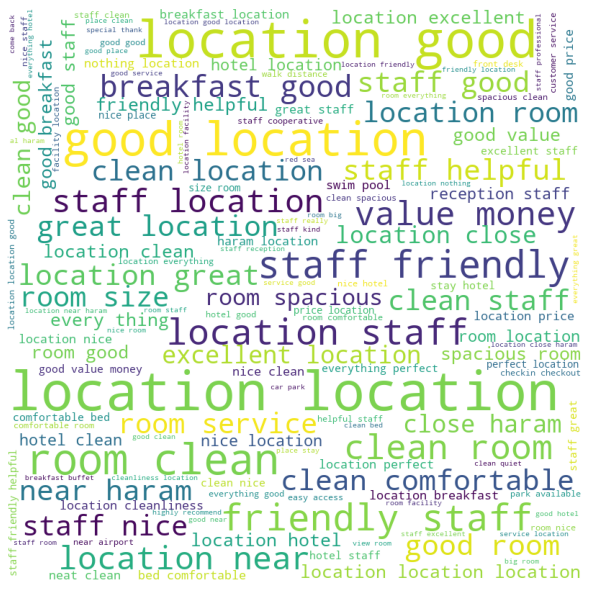

In [37]:
# create a pandas Series of the top 4000 most frequent words
#text_positive=bow_positive.iloc[0].sort_values(ascending=False)[:4000]

# create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
text2_dict_positive=bow_positive.iloc[0].sort_values(ascending=False).to_dict()

# create the WordCloud object
wordcloud_positive = WordCloud(width = 800, height = 800,min_word_length =3,
                background_color ='white',
                min_font_size = 10, stopwords = STOPWORDS,
                      collocations=True)

# generate the word cloud
wordcloud_positive.generate_from_frequencies(text2_dict_positive)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_positive)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [38]:
#instantiate a CountVectorizer object
# utilize the new STOP_WORDS list
cv_negative=CountVectorizer( stop_words=STOPWORDS, ngram_range=(2, 3))

# fit transform our text and create a dataframe with the result
corpus_negative = [' '.join(df['negative_review'].tolist())]
X_negative = cv_negative.fit_transform(corpus_negative)
X_negative = X_negative.toarray()

bow_negative=pd.DataFrame(X_negative, columns = cv_negative.get_feature_names())
bow_negative
#bow.index=speakers

C:\Users\mosha\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.

C:\Users\mosha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



aa assalamu  aa assalamu alaikum  aa lift  aa lift small  aaameen minor  \
0           57                   57        2              2              2   

   aaameen minor thing  aacott global  aacott global brand  aaid deposit  \
0                    2              1                    1             1   

   aaid deposit argument  ...  𝘀𝗼𝘂𝗻𝗱 𝗽𝗿𝗼𝗼𝗳 𝗮𝘀  𝘁𝗵𝗲 𝗿𝗼𝗼𝗺  𝘁𝗵𝗲 𝗿𝗼𝗼𝗺 𝗮𝗿𝗲𝗻𝘁  \
0                      1  ...               1         2               1   

   𝘁𝗵𝗲 𝗿𝗼𝗼𝗺 𝗯𝗲𝗰𝗮𝘂𝘀𝗲  𝘁𝗵𝗲𝘆 𝘀𝗮𝗶𝗱  𝘁𝗵𝗲𝘆 𝘀𝗮𝗶𝗱 𝗮𝗻𝗱  𝘄𝗮𝘀𝗻𝘁 𝘀𝗼𝘂𝗻𝗱  𝘄𝗮𝘀𝗻𝘁 𝘀𝗼𝘂𝗻𝗱 𝗽𝗿𝗼𝗼𝗳  \
0                 1          1              1            1                  1   

   𝘄𝗼𝗿𝗸𝗶𝗻𝗴 basically  𝘄𝗼𝗿𝗸𝗶𝗻𝗴 basically food  
0                  1                       1  

[1 rows x 449810 columns]

In [39]:
bow_negative.iloc[0].sort_values(ascending=False).to_dict()

{'room service': 4863,
 'room clean': 2425,
 'small room': 2293,
 'room small': 2250,
 'clean room': 1984,
 'nothing nothing': 1890,
 'old furniture': 1725,
 'swim pool': 1698,
 'hot water': 1615,
 'bad smell': 1611,
 'room size': 1496,
 'star hotel': 1223,
 'reception staff': 1131,
 'house keep': 1089,
 'furniture old': 1018,
 'little bite': 1010,
 'long time': 961,
 'car park': 902,
 'change room': 898,
 'inside room': 870,
 'hotel room': 868,
 'bed sheet': 851,
 'room room': 821,
 'take long': 801,
 'front desk': 791,
 'room need': 761,
 'air condition': 759,
 'bathroom small': 757,
 'stay hotel': 727,
 'breakfast buffet': 700,
 'room ready': 693,
 'size small': 687,
 'day stay': 666,
 'need maintenance': 662,
 'need improve': 660,
 'smell bad': 659,
 'price high': 654,
 'work properly': 645,
 'customer service': 638,
 'breakfast good': 633,
 'one room': 605,
 'book room': 602,
 'call reception': 591,
 'bed room': 589,
 'nothing everything': 581,
 'take long time': 580,
 'checkin ti

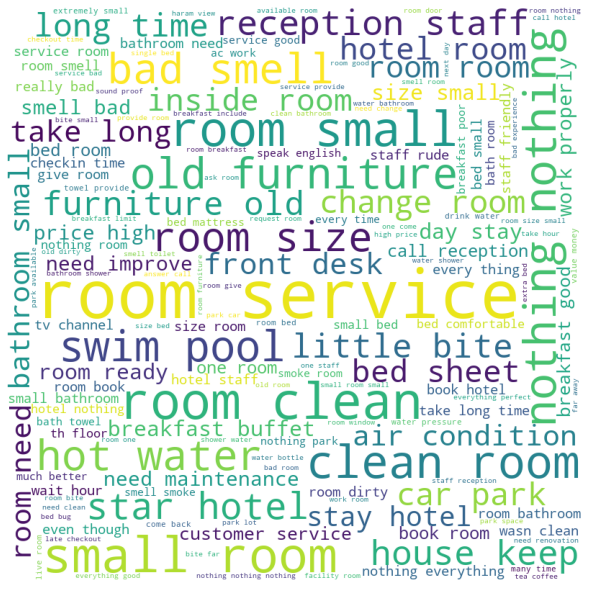

In [40]:
# create a pandas Series of the top 4000 most frequent words
#text_negative=bow_negative.iloc[0].sort_values(ascending=False)[:4000]

# create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
text2_dict_negative=bow_negative.iloc[0].sort_values(ascending=False).to_dict()

# create the WordCloud object
wordcloud_negative = WordCloud(width = 800, height = 800,min_word_length =3,
                background_color ='white',
                min_font_size = 10, stopwords = STOPWORDS,
                      collocations=True)

# generate the word cloud
wordcloud_negative.generate_from_frequencies(text2_dict_negative)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_negative)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Parts of Speech (POS) tagging 

In [41]:
#texts = df['Overall_review'].tolist()
#tagged_texts = pos_tag_sents(map(word_tokenize, texts))

In [42]:
def pos_tagging(text):    
    tagged = nltk.pos_tag(text.split())
    return tagged

In [43]:
pos_tagging(df['Overall_review'][0])

[('“don’t', 'JJ'),
 ('trust', 'NN'),
 ('stuff', 'NN'),
 ('make', 'VBP'),
 ('everything', 'NN'),
 ('paper', 'NN'),
 ('thief”', 'NN')]

In [44]:
df['Overall_review_POS'] = df['Overall_review'].apply(pos_tagging)

In [45]:
df['negative_review_POS'] = df['negative_review'].apply(pos_tagging)

In [46]:
df['positive_review_POS'] = df['positive_review'].apply(pos_tagging)

In [47]:
df['Overall_review_POS']

0         [(“don’t, JJ), (trust, NN), (stuff, NN), (make...
3         [(“very, RB), (good, JJ), (hotel, NN), (east, ...
4                              [(“value, JJ), (money”, NN)]
5                                              [(good, JJ)]
6                       [(“l, RB), (good, JJ), (stay”, NN)]
                                ...                        
357503                                  [(exceptional, JJ)]
357504    [(“i, JJ), (don’t, NN), (like, IN), (tim, NN),...
357505                                       [(“good”, NN)]
357506                                         [(good, JJ)]
357507                                    [(wonderful, NN)]
Name: Overall_review_POS, Length: 159027, dtype: object

### Named Entity Recognition

In [48]:
# process the text and print Named entities
#https://pythonprogramming.net/named-entity-recognition-nltk-tutorial/

# df["tokenized_positive_review"] = df["positive_review"].apply(nltk.word_tokenize)
# tokenized = df['tokenized_positive_review'].tolist()

# # function
# def get_named_entity():
#     try:
#         for i in tokenized:
#             print(i)
#             words = nltk.word_tokenize(i)
#             tagged = nltk.pos_tag(words)
#             namedEnt = nltk.ne_chunk(tagged, binary=True)
#             namedEnt.draw()
#     except:
#         pass
# get_named_entity()

In [49]:
#!python -m spacy download en_core_web_sm

In [50]:
# https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da
# ModuleNotFoundError: No module named 'spacy' ===> pip install -U spacy in anaconda prompt ===> python -m spacy download en_core_web_sm

import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [51]:
ner = spacy.load('en_core_web_sm')
def get_named_entity(text):
    doc = ner(text)
    return [(X.text, X.label_) for X in doc.ents]

In [52]:
get_named_entity(df['Overall_review'][8])

[('day', 'DATE')]

In [53]:
displacy.render(ner(df['Overall_review'][8]), jupyter=True, style='ent')

In [54]:
df['Overall_review_NER'] = df['Overall_review'].apply(get_named_entity)

In [55]:
df['positive_review_NER'] = df['positive_review'].apply(get_named_entity)

In [56]:
df['negative_review_NER'] = df['negative_review'].apply(get_named_entity)

In [57]:
df

Unnamed: 0           Hotel_name  Reviewer_rating reviewer_name  \
0                0      fndq-wryf-lshrq              1.0         Saleh   
3                3          golden-dune              8.0            Dr   
4                4          golden-dune              8.0          Eyad   
5                5          golden-dune              7.0         Ameen   
6                6          golden-dune              9.0        Nasser   
...            ...                  ...              ...           ...   
357503      357503  fndq-nkhb-lmlq-lryd             10.0        Faisal   
357504      357504  fndq-nkhb-lmlq-lryd              2.0       Fawziah   
357505      357505  fndq-nkhb-lmlq-lryd              9.0     Anonymous   
357506      357506  fndq-nkhb-lmlq-lryd              7.0     Anonymous   
357507      357507  fndq-nkhb-lmlq-lryd              9.0     Anonymous   

             Country                                   Overall_review  \
0       Saudi Arabia  “don’t trust stuff make everything paper thief”   
3       Saudi Arabia                    “very good hotel east riyadh”   
4       Saudi Arabia                                    “value money”   
5       Saudi Arabia                                             good   
6       Saudi Arabia                                    “l good stay”   
...              ...                                              ...   
357503  Saudi Arabia                                      exceptional   
357504  Saudi Arabia                 “i don’t like tim it’s much bad”   
357505  Saudi Arabia                                           “good”   
357506  Saudi Arabia                                             good   
357507  Saudi Arabia                                        wonderful   

        Review_times Review_date  \
0                 11  2022-08-07   
3                 33  2022-09-01   
4                118  2022-08-30   
5                 10  2022-08-30   
6                 31  2022-08-29   
...              ...         ...   
357503             1  2020-09-18   
357504             7  2020-06-02   
357505             1  2022-06-27   
357506            23  2022-03-19   
357507             5  2022-02-15   

                                              Review_tags  \
0       [Business trip,  Couple,  Small Double Room,  ...   
3       [Leisure trip,  Couple,  Superior Double Room,...   
4       [Business trip,  Solo traveler,  Superior Doub...   
5       [Solo traveler,  Superior Double Room,  Stayed...   
6       [Business trip,  Couple,  Superior Twin Room, ...   
...                                                   ...   
357503  [Business trip,  Solo traveler,  Deluxe Double...   
357504  [Leisure trip,  Couple,  Junior Suite,  Stayed...   
357505  [Business trip,  Solo traveler,  Deluxe Double...   
357506  [Family with young children,  Deluxe Double Ro...   
357507  [Leisure trip,  Couple,  Junior Suite,  Stayed...   

                                          negative_review  \
0                                               staff bad   
3       one problem small fly room although ask take p...   
4                                                location   
5       pay breakfast unfortunately breakfast start ho...   
6                                                 nothing   
...                                                   ...   
357503                                           location   
357504                                              baddd   
357505  sound music loud hear others noise can’t sleep...   
357506                                                 ok   
357507                   hot water shower didnt last long   

                                          positive_review  \
0                                                location   
3       size room really good bed comfortable furnitur...   
4                                         great breakfast   
5                                                location   
6              helpful staffvery nice 